In [49]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
def printf(format, *args):
    sys.stdout.write(format % args)

In [7]:
def g(x):
    a = x[0]
    b = x[1]
    alpha = x[2]
    return (1 + np.exp(-a) + np.exp(-b))** -alpha

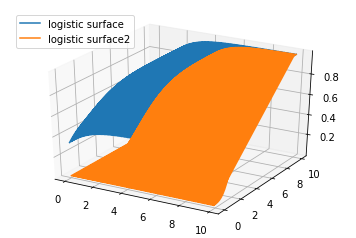

In [41]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(0,10.0,0.1)
y = np.arange(0,10.0, 0.1)

xall = []
yall = []
zall = []
z2all = []

for i in x:
    for j in y:
        p = [i,j,1]
        p2 = [i,j,10]
        z = g(p)
        z2 = g(p2)
        xall.append(i)
        yall.append(j)
        zall.append(z)
        z2all.append(z2)

ax.plot(xall, yall, zall, label='logistic surface')
ax.plot(xall, yall, z2all, label='logistic surface2')
ax.legend()

plt.show()

In [46]:
def conv1(x):
    a = x[0]
    b = x[1]
    alpha1 = 1
    alpha2 = 10
    ld = x[2]
    return (1 + np.exp(-a) + np.exp(-b))**-alpha1

def conv2(x):
    a = x[0]
    b = x[1]
    alpha1 = 1
    alpha2 = 10
    ld = x[2]
    return (1 + np.exp(-a) + np.exp(-b))**-alpha2

def conv(x):
    return conv1(x) + conv2(x)

def costs(x):
    a = x[0]
    b = x[1]
    alpha1 = 1
    alpha2 = 10
    ld = x[2]
    return a + b

def L(x):
    a = x[0]
    b = x[1]
    alpha1 = 1
    alpha2 = 10
    ld = x[2]
    return (1 + np.exp(-a) + np.exp(-b))**-alpha1 + (1 + np.exp(-a) + np.exp(-b))**-alpha2 + ld*(10-a-b)

def GL(x, money):
    a = x[0]
    b = x[1]
    alpha1 = 1
    alpha2 = 10
    ld = x[2]
    da = alpha1 * np.exp(-a)* (1 + np.exp(-a) + np.exp(-b))**(-alpha1 - 1) + alpha2 * np.exp(-a)* (1 + np.exp(-a) + np.exp(-b))**(-alpha2 - 1) - ld
    db = alpha1 * np.exp(-b)* (1 + np.exp(-a) + np.exp(-b))**(-alpha1 - 1) + alpha2 * np.exp(-b)* (1 + np.exp(-a) + np.exp(-b))**(-alpha2 - 1) - ld
    dld = money - a - b    
    return np.array([da,db,dld])

In [50]:
for m in np.arange(1,11,1):
    res = optimize.root(GL, [10,10,10], m)
    printf("Result: %s Cost %s Conv1 %.3f Conv2 %.3f Conv %.3f\n", res.x, costs(res.x), conv1(res.x), conv2(res.x), conv(res.x))

Result: [ 0.5         0.5         0.12481398] Cost 1.0 Conv1 0.452 Conv2 0.000 Conv 0.452
Result: [ 1.          1.          0.13064044] Cost 2.0 Conv1 0.576 Conv2 0.004 Conv 0.580
Result: [ 1.5         1.5         0.14520993] Cost 3.0 Conv1 0.691 Conv2 0.025 Conv 0.716
Result: [ 2.          2.          0.18088131] Cost 4.0 Conv1 0.787 Conv2 0.091 Conv 0.878
Result: [ 2.5         2.5         0.21476594] Cost 5.0 Conv1 0.859 Conv2 0.219 Conv 1.078
Result: [ 3.          3.          0.21642372] Cost 6.0 Conv1 0.909 Conv2 0.387 Conv 1.296
Result: [ 3.5         3.5         0.18528138] Cost 7.0 Conv1 0.943 Conv2 0.556 Conv 1.499
Result: [ 4.          4.          0.14034169] Cost 8.0 Conv1 0.965 Conv2 0.698 Conv 1.663
Result: [ 4.5         4.5         0.09786741] Cost 9.0 Conv1 0.978 Conv2 0.803 Conv 1.781
Result: [ 5.        5.        0.064714] Cost 10.0 Conv1 0.987 Conv2 0.875 Conv 1.861
